#### 1.Data Handling

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.figure_factory as ff
%matplotlib inline

In [2]:
#Load the data into pandas
econ_df=pd.read_excel(r'C:\Users\DAVID SEO\Desktop\data_practice\korea\korea_data.xlsx')
econ_df=econ_df.replace('','nan')
#set the index equal to the year column
econ_df=econ_df.set_index('Year')

#change the data type
econ_df=econ_df.astype(float)

#summary the data
display(econ_df.info())
print('-'*100)


#rename the columns
labels=['gdp_growth','gross_capital_formation','pop_growth','birth_rate','broad_money_growth','final_consume_growth',
        'gov_final_consume_growth','gross_captial_formation','hh_consum_growth','unemployement']
column_name=dict()
for i,j in zip(econ_df.columns,labels):
    column_name.update({i:j})

econ_df.columns
econ_df=econ_df.rename(columns=column_name)

#drop the last row since it copntains the nan
econ_df=econ_df.iloc[:-1,:] 
econ_df.head()






<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1969 to 2017
Data columns (total 10 columns):
GDP growth (annual %)                                                    49 non-null float64
Gross capital formation (% of GDP)                                       49 non-null float64
Population growth (annual %)                                             49 non-null float64
Birth rate, crude (per 1,000 people)                                     48 non-null float64
Broad money growth (annual %)                                            49 non-null float64
Final consumption expenditure (annual % growth)                          49 non-null float64
General government final consumption expenditure (annual % growth)       49 non-null float64
Gross capital formation (annual % growth)                                49 non-null float64
Households and NPISHs Final consumption expenditure (annual % growth)    49 non-null float64
Unemployment, total (% of total labor force) (national 

None

----------------------------------------------------------------------------------------------------


,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consume_growth,gov_final_consume_growth,gross_captial_formation,hh_consum_growth,unemployement
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


### 2.2 Multicolinearity 

One of the assumptions of our model is that there isn't any Perfect multicollinearity. Multicollinearity is where one of the explanatory variables is highly correlated with another explanatory variable. In essence, one of the X variables is almost perfectly correlated with another or multiple X variables.

The problem with multicollinearity, from a math perspective, is that the coefficient estimates themselves tend to be unreliable. Additionally, the standard errors of slope coefficients become artificially inflated. Because the standard error is used to help calculate the p-value, this leads to a higher probability that we will incorrectly conclude that a variable is not statistically significant.

Let's look at some of the ways to detect if multicolinearity exsits


#### 2.2.1 Scatter plot

The first thing we can do is create a correlation matrix using the corr() function; this will create a matrix with each variable having its correlation calculated for all the other variables.


,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consume_growth,gov_final_consume_growth,gross_captial_formation,hh_consum_growth,unemployement
gdp_growth,1.000000,0.086712,0.567216,0.553225,0.335249,0.855835,0.098183,0.825496,0.868848,-0.160783
gross_capital_formation,0.086712,1.000000,-0.215243,-0.241668,-0.163803,0.266617,0.118075,0.187885,0.268592,-0.618524
pop_growth,0.567216,-0.215243,1.000000,0.978754,0.548336,0.470449,0.357042,0.317556,0.442187,0.279486
birth_rate,0.553225,-0.241668,0.978754,1.000000,0.530563,0.458319,0.370517,0.305254,0.428266,0.313783
broad_money_growth,0.335249,-0.163803,0.548336,0.530563,1.000000,0.290507,0.287270,0.235561,0.267220,0.336335
final_consume_growth,0.855835,0.266617,0.470449,0.458319,0.290507,1.000000,0.323250,0.700392,0.993526,-0.299310
gov_final_consume_growth,0.098183,0.118075,0.357042,0.370517,0.287270,0.323250,1.000000,0.033376,0.216641,0.007940
gross_captial_formation,0.825496,0.187885,0.317556,0.305254,0.235561,0.700392,0.033376,1.000000,0.715021,-0.207261
hh_consum_growth,0.868848,0.268592,0.442187,0.428266,0.267220,0.993526,0.216641,0.715021,1.000000,-0.304797
unemployement,-0.160783,-0.618524,0.279486,0.313783,0.336335,-0.299310,0.007940,-0.207261,-0.304797,1.000000


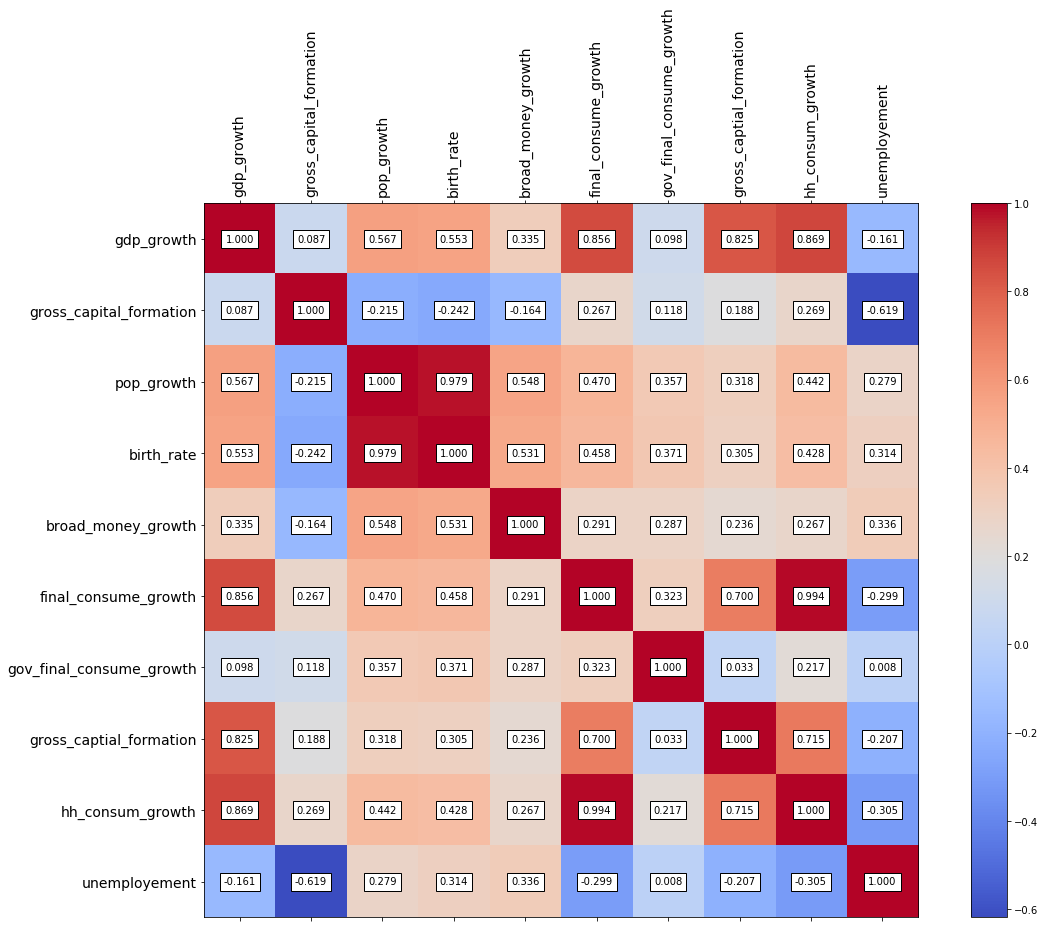

In [3]:
#calculate the correlation matrix
corr=econ_df.corr()
#display the correlation matrix
display(corr)

#plot the correlation heatmap
fig,ax=plt.subplots(figsize=(17,13))
cat=ax.matshow(corr,cmap='coolwarm')
ax.set_xticks(np.arange(0,10))
fig.colorbar(cat)
ax.set_xticklabels(econ_df.columns,fontsize=14,rotation=90)
ax.set_yticks(np.arange(0,10))
ax.set_yticklabels(econ_df.columns,fontsize=14)

for i in range(10):
    for j in range(10):
        ax.text(i,j,'{:.3f}'.format(corr.iloc[i,j]),ha='center',va='center',bbox=dict(facecolor='white'))

fig.tight_layout()
plt.show()

Looking at the matshow ,we can identify a few higly correlated varaibles. For example, if you look at the correlation between birth_rate and pop_growth it ends up at almost .98.  This is an extremely high correlation and marks it as a candidate to be removed. 




#### 2.2.2 Variance Infation Factor

We should be more systematic in our approach to removing highly correlated variables. One method we can use is the **variance inflation factor** which is a measure of how much a particular variable is contributing to the standard error in the regression model. When significant multicollinearity exists, the variance inflation factor will be huge for the variables in the calculation.

VIF is computed by 
$$
VIF= 1/tolerance=1/(1-R^2)
$$

The formula suggests that if the stron correlation between two variables which means that the denomintor is getting smaller, 
VIF is more likely to be larger to indcate that there exists multicolinearity.

A general recommendation is that  any of our continuous variabes come back with a value of 5 or higher, then they should be removed from the model. For the dummy variable, VIF more than 3 is a indication of multicolinearity.



In [4]:
econ_df_before=econ_df
econ_df_after=econ_df.drop(['birth_rate','final_consume_growth','gov_final_consume_growth','hh_consum_growth'],axis=1)

x1=sm.tools.add_constant(econ_df_before)#adding constant term
x2=sm.tools.add_constant(econ_df_after)

#creating a series for both
series_before=pd.Series([variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])],index=x1.columns)
series_after=pd.Series([variance_inflation_factor(x2.values,i) for i in range(x2.shape[1])],index=x2.columns)
#display the series
print("Data Beofre")
print('-'*100)
display(series_before)
print('-'*100)
display(series_after)

Data Beofre
----------------------------------------------------------------------------------------------------


C:\Users\DAVID SEO\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                        314.550195
gdp_growth                     9.807879
gross_capital_formation        2.430057
pop_growth                    25.759263
birth_rate                    26.174368
broad_money_growth             1.633079
final_consume_growth        2305.724583
gov_final_consume_growth      32.527332
gross_captial_formation        3.796420
hh_consum_growth            2129.093634
unemployement                  2.800008
dtype: float64

----------------------------------------------------------------------------------------------------


const                      206.678041
gdp_growth                   5.028753
gross_capital_formation      1.675536
pop_growth                   2.320343
broad_money_growth           1.562999
gross_captial_formation      3.606165
unemployement                2.037623
dtype: float64

I also want to demonstrate another way to visualize our data to check for multicollinearity. Inside of pandas, there is a scatter_matrix chart that will create a scatter plot for each variable in our dataset against another variable. This is a great tool for visualizing the correlation of one variable across all the other variables in the dataset. I'll take my econ_df_after and pass it through the scatter_matrix method. What you're looking for is a more random distribution, there shouldn't be any strong trends in the scatter matrix as this would be identifying correlated variables. Now, for our explanatory variable, we want to see trends!

C:\Users\DAVID SEO\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2DE050940>,
      dtype=object)

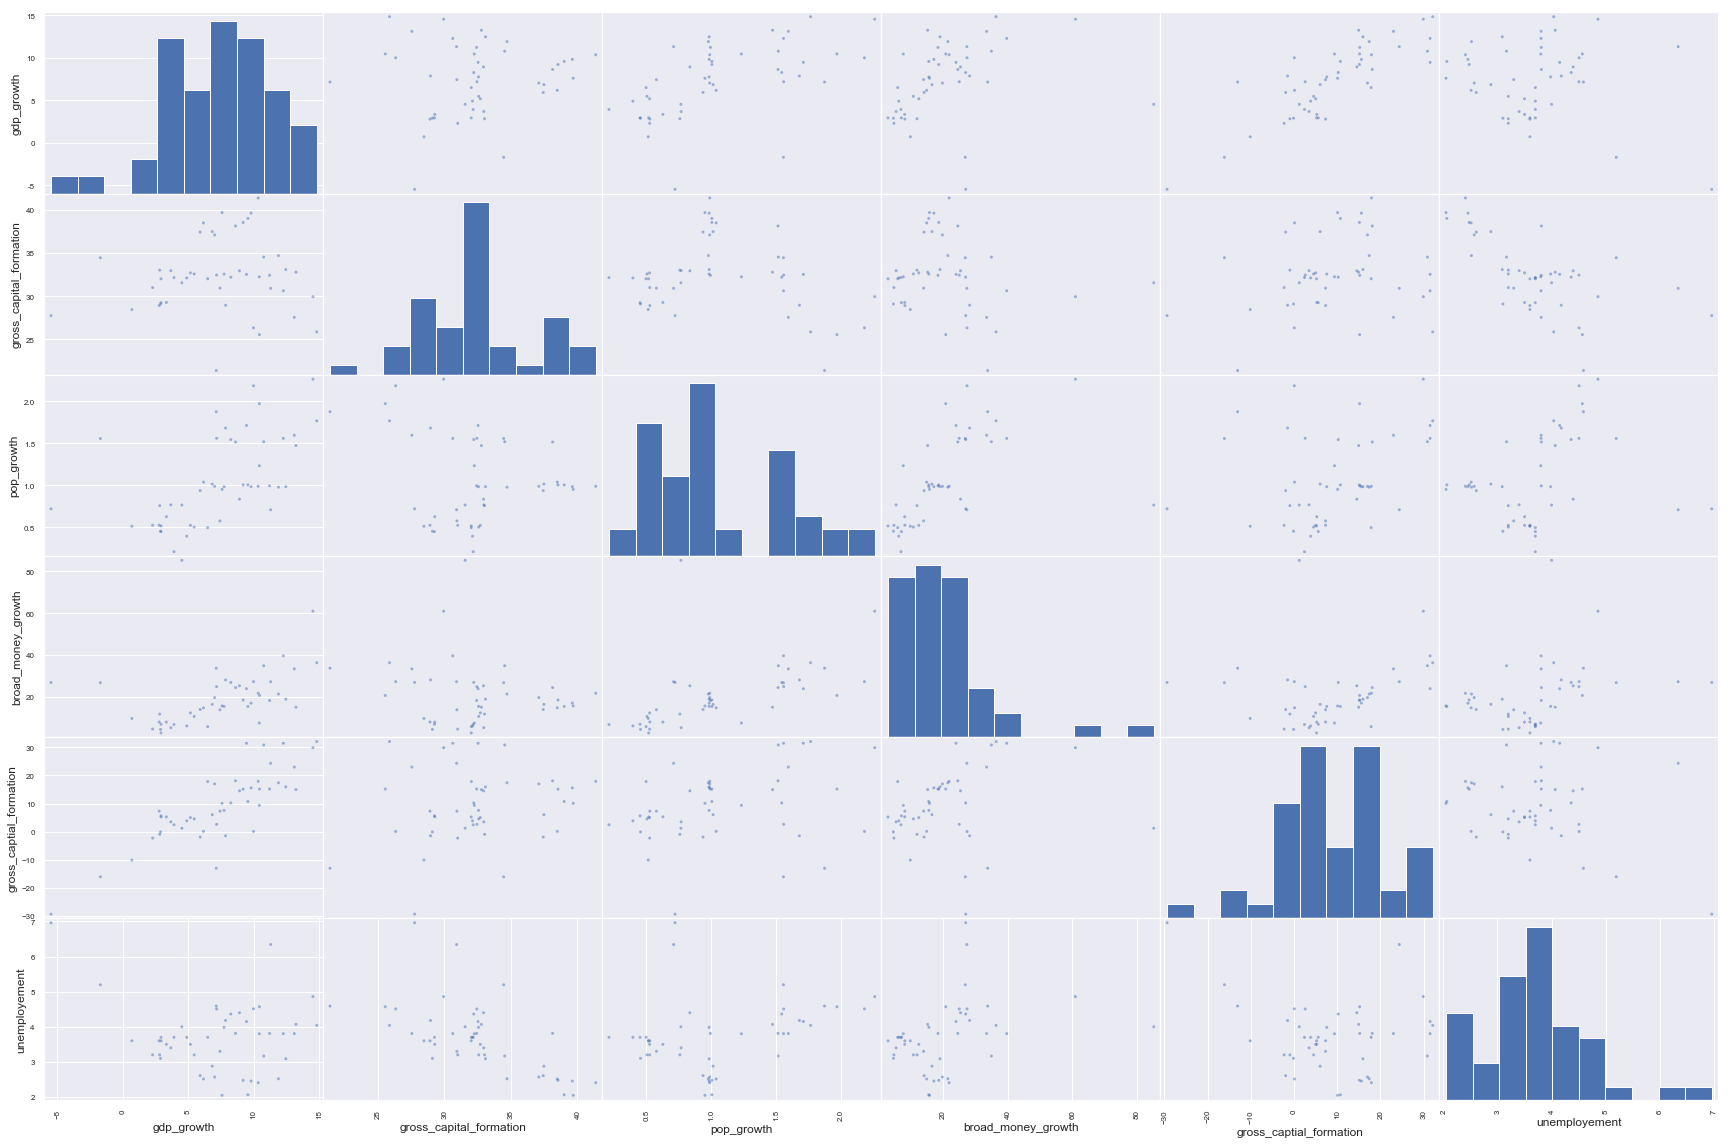

In [10]:
fig,ax=plt.subplots(figsize=(30,20))
pd.plotting.scatter_matrix(econ_df_after,ax=ax)

### Section Four: Describe the Data Set

Before we get to an in-depth exploration of the data or even building the model, we should explore the data a little more and see how the data is distributed and if there are any outliers. I will be adding a few more metrics to the summary data frame, sp that it now includes a metric for three standard deviations below and above the mean.

I'll store my information in a new variable called desc_df.

In [11]:
desc_df=econ_df_after.describe()
desc_df
# add standard devition metric 
# 3*standard deviation is in equivalent to almost 99% of total distribution



,gdp_growth,gross_capital_formation,pop_growth,broad_money_growth,gross_captial_formation,unemployement
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,20.426621,8.965681,3.678096
std,4.209306,4.136932,0.514039,14.748442,12.629912,0.968616
min,-5.471219,21.404761,0.211998,2.980690,-29.403255,2.048000
25%,4.374899,29.776910,0.615602,10.586461,2.114078,3.150475
50%,7.513471,32.335229,0.985132,17.807598,7.431966,3.700000
75%,10.376191,34.474874,1.525765,26.923837,16.210283,4.088500
max,14.827554,41.374062,2.263434,85.203081,32.098276,6.963000


##  outliers

###  Outlier Detection

#### 1. standard deviation Metric

We will put additional summary to see if there exist outliers in each variable.  three standard deviation below and obove is equivaent to almost 99 % of total distribution. Any observations lying outside this range is belived to be outliers. 

In [12]:
desc_df.loc['+3_std']=desc_df.loc['50%']+3*desc_df.loc["std"]
desc_df.loc['-3_std']=desc_df.loc['50%']-3*desc_df.loc['std']
desc_df

,gdp_growth,gross_capital_formation,pop_growth,broad_money_growth,gross_captial_formation,unemployement
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,20.426621,8.965681,3.678096
std,4.209306,4.136932,0.514039,14.748442,12.629912,0.968616
min,-5.471219,21.404761,0.211998,2.980690,-29.403255,2.048000
25%,4.374899,29.776910,0.615602,10.586461,2.114078,3.150475
50%,7.513471,32.335229,0.985132,17.807598,7.431966,3.700000
75%,10.376191,34.474874,1.525765,26.923837,16.210283,4.088500
max,14.827554,41.374062,2.263434,85.203081,32.098276,6.963000
+3_std,20.141389,44.746026,2.527248,62.052924,45.321702,6.605849
-3_std,-5.114446,19.924431,-0.556984,-26.437728,-30.457769,0.794152


Looking at the data frame up above, a few values are standing out, for example, the maximum value in the broad_money_growth column is almost four standard deviations above the mean. Such an enormous value would qualify as an outlier.

#### 2 Boxplot

Text(0.5, 1.0, 'Boxplot for Explanatory Variables')

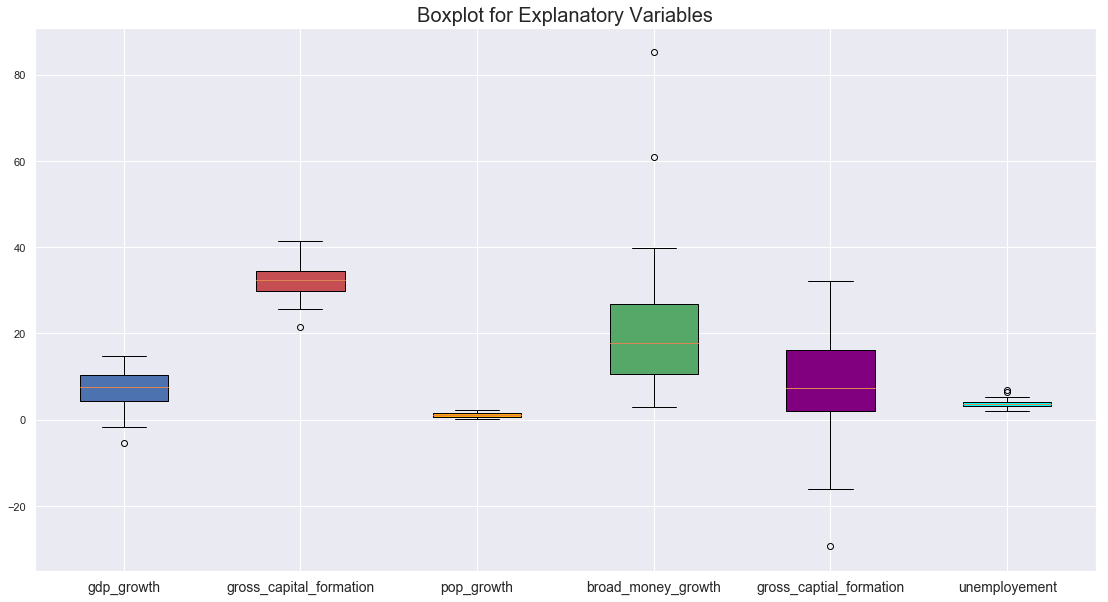

In [13]:
sns.set()
#boxplot
fig,ax=plt.subplots(figsize=(19,10))

#labels=econ_df_after.colum
data=[econ_df_after.iloc[:,i] for i in range(len(econ_df_after.columns))]
labels=econ_df_after.columns
bplot=ax.boxplot(data,labels=labels,patch_artist=True)
colors=['b','r','orange','g','purple','cyan']
for patch,color in zip(bplot['boxes'],colors):
    patch.set_facecolor(color)
ax.set_xticklabels(labels=labels,fontsize=14)
ax.set_title('Boxplot for Explanatory Variables',fontsize=20)

#### 3 outlier tests

- _Grubbs' Test_ : this is the recommended test when testing for a **single outlier**.

- _Generalized Extreme Studentized Deviate (ESD) Test_ : this test requires only **an upper bound on the suspected number of outliers**       and is the recommended test when the **exact number of outliers is not known**.

We will skip these tests since some of outliers occur on the lower bound.

### 4  sigma clipping

After checking the box plot, we use the sigma clipping method to remove outlieres. Sigma clipping only includes the observations 
located within the range as specified by the formula below.

$$
mean -std*constant < observation < mean +std*constant
$$



In [14]:
def sigma_clipping(data,const):
    mean=np.mean(econ_df_after)
    std=np.std(econ_df_after)
    data=data.query('(@data>@mean-@std*@const)&(@data<@mean+@std*@const)')
    return data

econ_remove_df=sigma_clipping(econ_df_after,3).dropna()
econ_remove_df.head()

,gdp_growth,gross_capital_formation,pop_growth,broad_money_growth,gross_captial_formation,unemployement
Year,,,,,,
1969,14.541235,29.943577,2.263434,60.984733,29.908118,4.86
1970,9.997407,26.338200,2.184174,27.422864,0.058667,4.51
1971,10.454693,25.558501,1.971324,20.844481,15.172870,4.57
1972,7.150715,21.404761,1.875999,33.815028,-13.056701,4.59
1973,14.827554,25.872858,1.768293,36.415629,32.098276,4.04


## Section Five: Build the Model

Okay, now that we've loaded, cleaned, and explored the data we can proceed to the next part, building the model. The first thing we need to do is, define our exploratory variables and our explanatory variable. From here, let's split the data into a training and testing set; a healthy ratio is 20% testing and 80% training but a 30% 70% split is also ok.

After splitting the data, we will create an instance of the linear regression model and pass through the X_train and y_train variables using the fit() function.

In [16]:
#define our input variable and output variable
X=econ_remove_df.drop('gdp_growth',axis=1)
Y=econ_remove_df['gdp_growth']
#Split X and Y into X_ and Y_
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

#Create a Linear Regression model Predict
regression_model=LinearRegression()
regression_model.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


### Exploring the Output

With the data now fitted to the model, we can explore the output. The first thing we should do is look at the intercept of the model, and then we will print out each of the coefficients of the model. I print everything out using a loop to make it more efficient.

The intercept term is the value of the dependent variable when all the independent variables are equal to zero. For each slope coefficient, it is the estimated change in the dependent variable for a one unit change in that particular independent variable, holding the other independent variables constant.

For example, if all the independent variables were equal to zero, then the gdp_growth would be 2.08%. If we looked at the gross_cap_form_growth while holding all the other independent variables constant, then we would say for a 1 unit increase in gross_cap_form_growth would lead to a 0.14% increase in GDP growth.


The intercept term is the value of the dependent variable when all the independent variables are equal to zero. For each slope coefficient, it is the estimated change in the dependent variable for a one unit change in that particular independent variable, holding the other independent variables constant.

We can also now make predictions with our newly trained model. The process is simple; we call the predict method and then pass through some values. In this case, we have some values predefined with the x_test variable so we will pass that through. Once we do that, we can select the predictions by slicing the array.


In [41]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_
coefficent = regression_model.coef_


#Create a table to show all the outtputs
features=['intercept',(*X.columns)]
feature_values=[intercept,(*coefficent)]
econ_after_df=[features,feature_values]
table=ff.create_table(econ_after_df)
table['layout'].update(height=100,width=1400)
table.show()

In [46]:
from sklearn.metrics import mean_squared_error
#predict values based  on our trainded model
Y_predict=regression_model.predict(X_test)

#Compute MSE(Mean Squared Error)
mse=np.mean((Y_predict-Y_test)**2) 
##Alternatively
mse=mean_absolute_error(Y_predict,Y_test)



#### Section Six: Evaluating the Model

Using the Statsmodel
To make diagnosing the model easier, we will, from this point forward, be using the statsmodel module. This module has built-in functions that will make calculating metrics quick. However, we will need "rebuild" our model using the statsmodel module. We do this by creating a constant variable, call the OLS() method and then the fit() method. We now have a new model, and the first thing we need to do is to make sure that the assumptions of our model hold. This means checking the following:

- Regression residuals must be normally distributed.
- The residuals are homoscedastic
- Absence of multicollinearity (we did this above).
- No Autocorrelation.


In [60]:
#define our input
X2=sm.add_constant(X)
#create a OLS model
model=sm.OLS(Y,X2)
#fit the data
est=model.fit()

#create instance of influence
influence=est.get_influence()

#Computing the standardized_residual
standardized_residual=influence.resid_studentized_internal

C:\Users\DAVID SEO\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



array([-0.60726093,  0.84179322, -0.30533638,  1.21502248,  0.04488432,
       -2.37955902,  0.51198577,  0.42010845, -0.94335247, -1.6372422 ,
       -0.88954198, -2.68832913,  0.11063615, -0.22788432,  2.05394533,
        1.5568126 ,  0.60516749,  1.42502776,  1.77645495,  1.20422221,
       -1.1763752 ,  0.47747176,  0.47744444,  0.25316272,  0.04228948,
        0.14403663,  0.75015468, -0.12815382,  0.50450457,  2.11455236,
        0.69648421,  0.81312812, -0.92440055,  0.40216606,  0.31342204,
        0.10905817,  0.25815052, -0.83733247, -0.5738295 , -0.4676103 ,
       -0.76444682, -0.61207599, -0.53123074, -1.03744114, -1.39026938,
       -0.97140356])

By creating the influence instatnce, you get an acess to a variety of statistical matrics

```python
#leverage (hat values)
leverage = influence.hat_matrix_diag

#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external

```

### What is the problem with heteroscedasticity?

There are two big reasons why you want homoscedasticity:

While heteroscedasticity does not cause bias in the coefficient estimates, it causes the coefficient estimates to be less precise. The Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

Heteroscedasticity tends to produce p-values that are smaller than they should be. This effect occurs because heteroscedasticity increases the variance of the coefficient estimates, but the OLS procedure does not detect this increase. Consequently, OLS calculates the t-values and F-values using an underestimated amount of variance. This problem can lead you to conclude that a model term is statistically significant when it is not significant.

### 1. scatter plot


Text(0, 0.5, 'Standardized Residual')

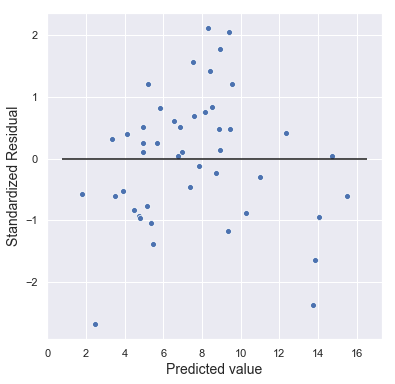

In [80]:
fig,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(est.predict(),standardized_residual)
ax.hlines(0,min(est.predict())-1,max(est.predict())+1)
ax.set_xlabel('Predicted value',fontsize=14)
ax.set_ylabel('Standardized Residual',fontsize=14)


### 3. Test for heteroscedasticity

To check for heteroscedasticity, we can leverage the statsmodels.stats.diagnostic module. This module will give us to a few test functions we can run, the Breusch-Pagan and the White test for heteroscedasticity. The Breusch-Pagan is a more general test for heteroscedasticity while the White test is a unique case.

The null hypothesis for both the White’s test and the Breusch-Pagan test is that the variances for the errors are equal:
H0 = σ2i = σ2
The alternate hypothesis (the one you’re testing), is that the variances are not equal:
H1 = σ2i ≠ σ2
Our goal is to fail to reject the null hypothesis, have a high p-value because that means we have no heteroscedasticity.

-----------------------------------------------------------------------------------------------------------------------------------
Note that

Endogenous variables designates variables in an economic/econometric model that are explained, or predicted, by that model. 

Exogenous variables designates variables that appear in an economic/econometric model, but are not explained by that model (i.e. they are taken as given by the model).


In [112]:
def heter_test(residual,exog,test,alpha): # test should be either 'white' of 'bp'
    if test=='whitle':
        statics,p_value,f_statics,f_value=diag.het_white(residual,exog,retres=False)
    else:
        statics,p_value,f_statics,f_value=diag.het_breuschpagan(residual,exog)
    if p_value>alpha:
        comment='Fail to reject the null hypothesis'
    else:
        comment='Reject the null hypothesis'
    return [test,statics,p_value,alpha,comment]

table=[['test_name','statics','p_value','significance level','comment']]
white_test=heter_test(est.resid,est.model.exog,'white',0.05)
bp_test=heter_test(est.resid,est.model.exog,'bp',0.05)
table.append(white_test)
table.append(bp_test)
table=ff.create_table(table)
table['layout'].update(width=1400)
table.show()



### How to test for autocorrelation?

Again, we will go to our favorite module the statsmodels.stats.diagnostic module, and use the Ljung-Box test for no autocorrelation of residuals. Here:

H0: The data are random.
Ha: The data are not random.
That means we want to fail to reject the null hypothesis, have a large p-value because then it means we have no autocorrelation. To use the Ljung-Box test, we will call the acorr_ljungbox function, pass through the est.resid and then define the lags.

The lags can either be calculated by the function itself, or we can calculate them. If the function handles it the max lag will be min((num_obs // 2 - 2), 40), however, there is a rule of thumb that for non-seasonal time series the lag is min(10, (num_obs // 5)).

We also can visually check for autocorrelation by using the statsmodels.graphics module to plot a graph of the autocorrelation factor.

The number of lags will be 9
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.007824
We reject the null hypthoesis, so there is autocorrelation.
----------------------------------------------------------------------------------------------------


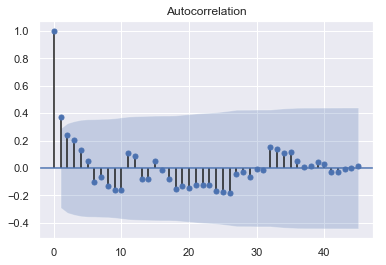

In [114]:

from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()